## CLU - 4.09 - Clustering - Final Assignment

In this notebook you'll have 2 sets of the data to find clusters for. Each of the datasets has only 2 features. 
For each dataset, you'll have to:
1. Plot the data
2. Choose an appropriate model to the cluster. 
3. Depending on the choice of model you may have to choose the best number of clusters.
4. Score the model, using an appropriate clustering metric.
5. Plot the data indicating to which cluster each datapoint belongs

# Load cluster data 1

In [1]:
import pandas as pd

df = pd.read_csv("cluster_data_1.csv")
df.head()

,x1,x2
0,25.0514,5.7475
1,26.6614,7.3414
2,25.2653,6.2466
3,25.2285,4.7447
4,25.7529,5.1564


## Plot data

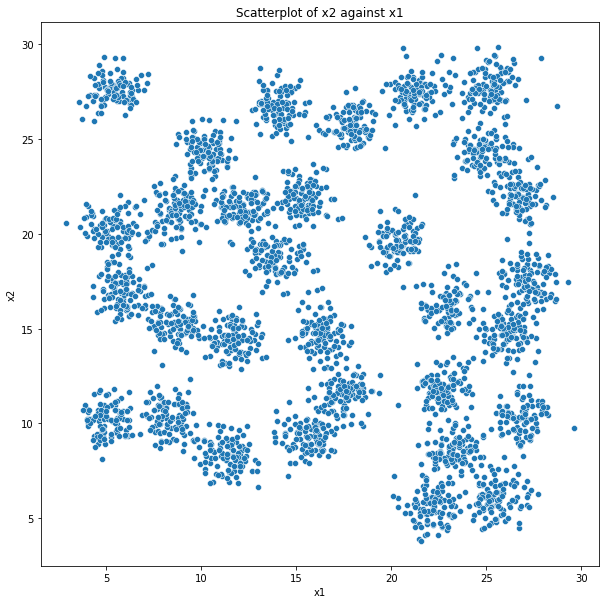

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
_ = sns.scatterplot(data=df, x="x1", y="x2", palette="Set2").set_title("Scatterplot of x2 against x1")
plt.show()

## Kmeans 

*There look to be a lot of small clusters. The number of clusters isn't obvious*

*As the clusters look to be "blob like" and of similar density, I'm going to try k-means as a first pass*

In [3]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_values = np.arange(3, 35, step=1)
silhouette_scores = []
inertia_scores = []
for k in k_values:
    model = KMeans(n_clusters=k).fit(df)
    silhouette_scores.append(silhouette_score(df, model.labels_))
    inertia_scores.append(model.inertia_)

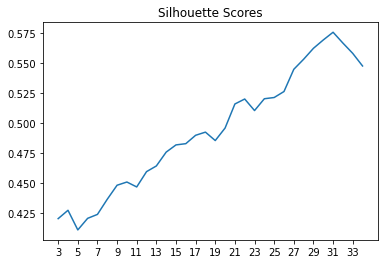

In [4]:
plt.plot(k_values, silhouette_scores)
plt.title("Silhouette Scores")
plt.xticks(np.arange(k_values.min(), k_values.max(), step=2))
plt.show()

In [5]:
k = np.argmax(silhouette_scores) + k_values.min()
k

31

In [6]:
model = KMeans(n_clusters=k).fit(df)
labels = model.labels_
centroids = model.cluster_centers_

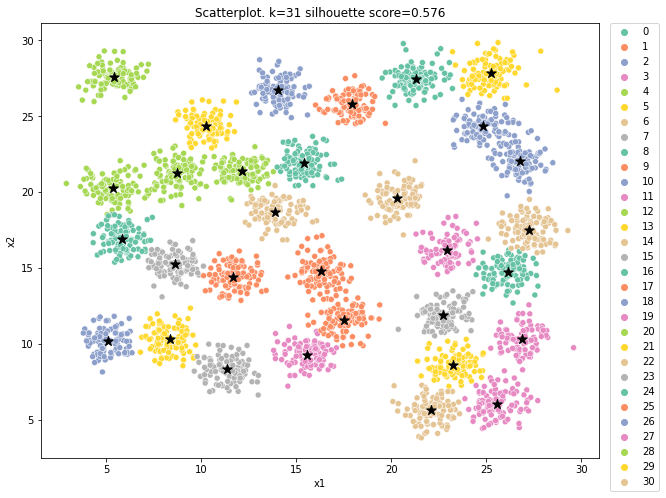

In [7]:
from sklearn.metrics import silhouette_score

plt.figure(figsize=(10,8))
score = silhouette_score(df, labels)
sns.scatterplot(data=df, x="x1", y="x2", 
                    hue=labels, 
                    legend="full",
                    palette="Set2").set_title(f"Scatterplot. k={k} silhouette score={score:.3f}")
_ = plt.scatter(centroids[:,0], centroids[:,1], c='black', marker='*', s=100)
_ = plt.legend(bbox_to_anchor=(1.02, 1), loc=0, borderaxespad=0.)

*This looks like a good result*

*We've clustered our data into about 31 clusters using k-means using the silhouette score to find the best number*

*Interestingly, the silhouette score (0.576) isn't very high.*

# Load Cluster data 2

In [8]:
df2 = pd.read_csv("cluster_data_2.csv")
df2.columns=['x1', 'x2']
df2.head()

,x1,x2
0,15.55,28.65
1,14.90,27.55
2,14.45,28.35
3,14.15,28.80
4,13.75,28.05


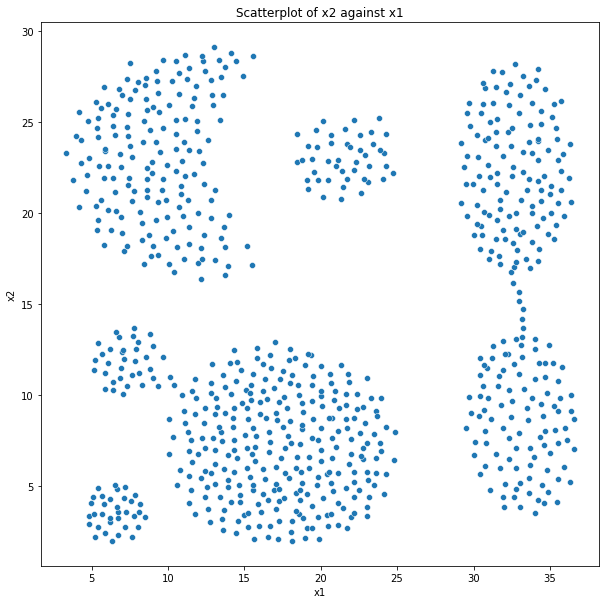

In [9]:
plt.figure(figsize=(10, 10))
_ = sns.scatterplot(data=df2, x="x1", y="x2", palette="Set2").set_title("Scatterplot of x2 against x1")

*Looks like there's about 7 clusters*

*The clusters aren't of equal size or blob like, but let's try KMeans as a start anyway*

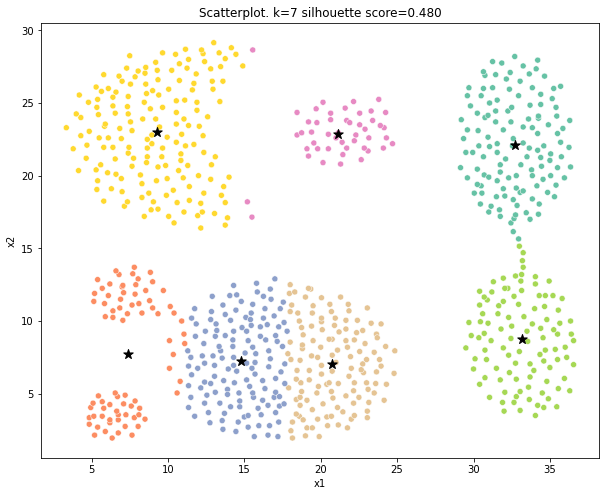

In [10]:
from sklearn.cluster import KMeans

k = 7
model = KMeans(n_clusters=k).fit(df2)
labels = model.labels_
centroids = model.cluster_centers_
plt.figure(figsize=(10,8))
score = silhouette_score(df2, labels)
_ = sns.scatterplot(data=df2, x="x1", y="x2", 
                    hue=labels, 
                    palette="Set2", 
legend=False).set_title(f"Scatterplot. k={k} silhouette score={score:.3f}")
_ = plt.scatter(centroids[:,0], centroids[:,1], c='black', marker='*', s=100)

*Kmeans runs into trouble with the clusters at the bottom... We'll have to try something else*

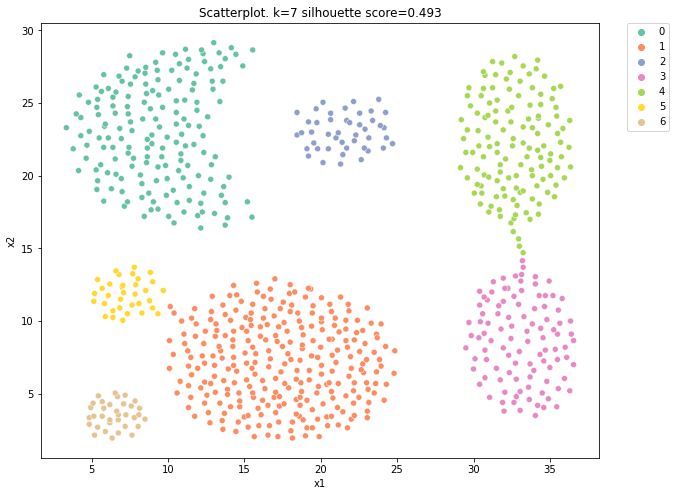

In [11]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=7, linkage='average').fit(df2)
labels = model.labels_

plt.figure(figsize=(10,8))
score = silhouette_score(df2, labels, metric='euclidean')
sns.scatterplot(data=df2, x="x1", y="x2", 
                    hue=labels, 
                    palette="Set2", legend="full").set_title(f"Scatterplot. k=7 silhouette score={score:.3f}")
_ = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

*It would appear that Agglomerative Clustering has done a good job of identifying the clusters*

*Note: Silhouette score isn't very high here either, but that's probably more to do with the data. Very high silhouette scores are only possible with data that has large distance between clusters such as:*

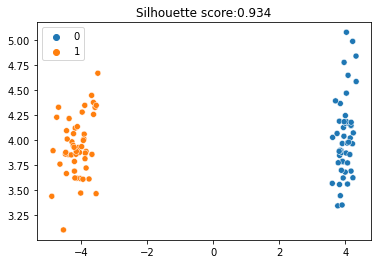

In [12]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, 
                           n_informative=2,
                           random_state=1, 
                           class_sep=4,
                           n_clusters_per_class=1)
model = KMeans(n_clusters=2).fit(X)
score = silhouette_score(X, model.labels_, metric='euclidean')

sns.scatterplot(x=X[:,0], y=X[:,1], hue=y).set_title(f'Silhouette score:{score:.3f}')
plt.show()